In [1]:
import event_detection
import plotting
import spike_LFP

In [2]:
# Folder of the open_ephys recording
Folder = '/camp/home/combadk/working/raw_data/raw_NP/NP_221003_A/2022-10-06_14-53-28'
phy_path = '/camp/home/combadk/working/raw_data/raw_NP/NP_221003_A/sorted_ks2_5/2022-10-06_14-53-28_B/phy output/'
# Frequency of the recording (LFP)
fs = 2500
# window [s] to look at (duration of the chunk to extract)
window = 10
# Start of the chunk to extract from the recording
start = 6400
# Frequency of the recording (spike)
fsd =30000

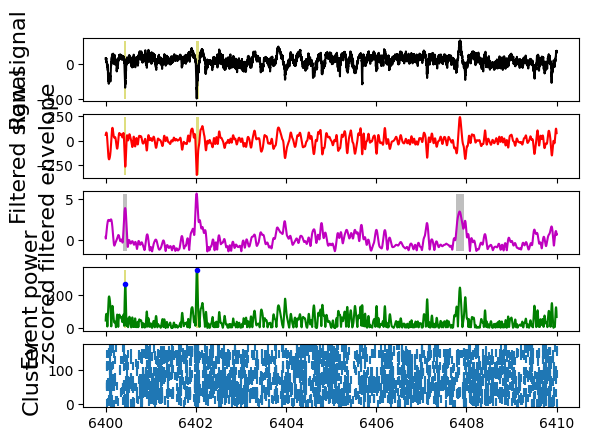

([0.04280000000017026, 0.06639999999970314],
 [1032, 4988],
 [1140, 5155],
 [1085, 5051],
 [6400.4128, 6401.9952],
 [6400.456, 6402.062],
 [6400.434, 6402.0204],
 [264.45441583961116, 349.7089412916531])

In [3]:
# load the data (LFP=1 -> LFP recording from the open_ephys folder)
recording, timestamp = event_detection.load_openephys(Folder ,fs, window, start, LFP=1)
# preprocessed the data (CMR, and Transposition)
recording = event_detection.preprocessing(recording)
# Average over 24 channel
recording = event_detection.average_over_channel(recording, 0)
# Gathering the spike
spike_event = spike_LFP.spike_phy(phy_path, channel_treshold=384 ,fs= fsd, chunk=(True,start,start+(window)))
# Rearranging the spike for the raster
raster = spike_LFP.raster(spike_event)
# Detection of the event with 4 as the standart deviation factor, showing the plot
event_detection.detection(recording, timestamp ,fs, std_factor=4, show = False, spike=(True,raster))

  0%|          | 0/30 [00:00<?, ?it/s]

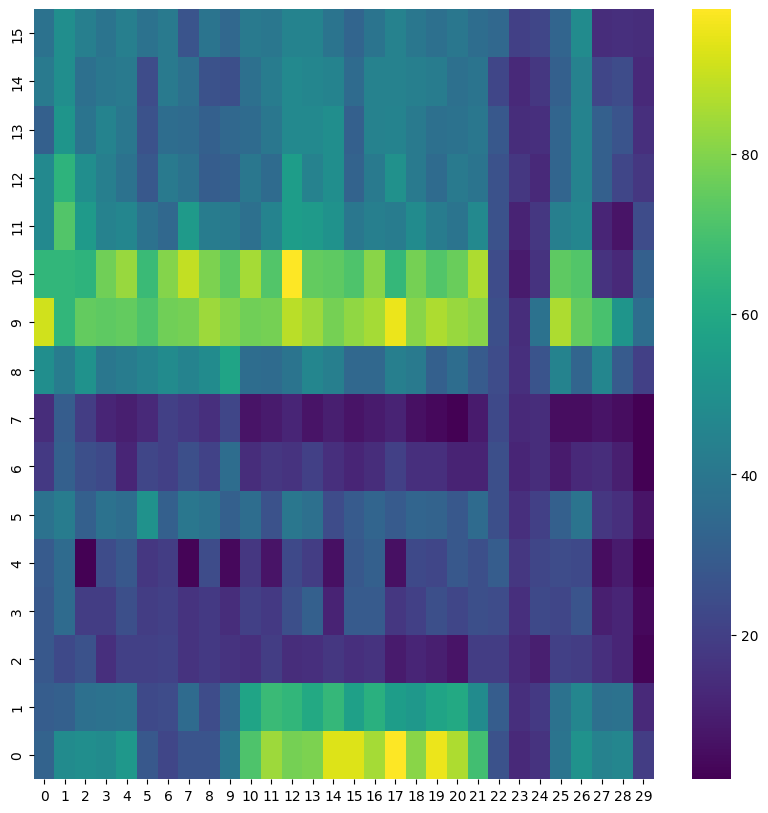

In [5]:
# window to perform the heatmap in [s]
window = 300
bp_filt= (2,20)
std_fac = 4
# Creation of an heatmap based on the number of event detected across each window of the recording
plotting.heatmap(Folder,fs, window, std_fac, bp_filt)

In [ ]:
# window to perform the heatmap in [s]
window = 300
# Creation of an histogram based on the number of event detected across each window of the recording at the tip of the probe 
plotting.hist(Folder,fs, window)

  0%|          | 0/30 [00:00<?, ?it/s]

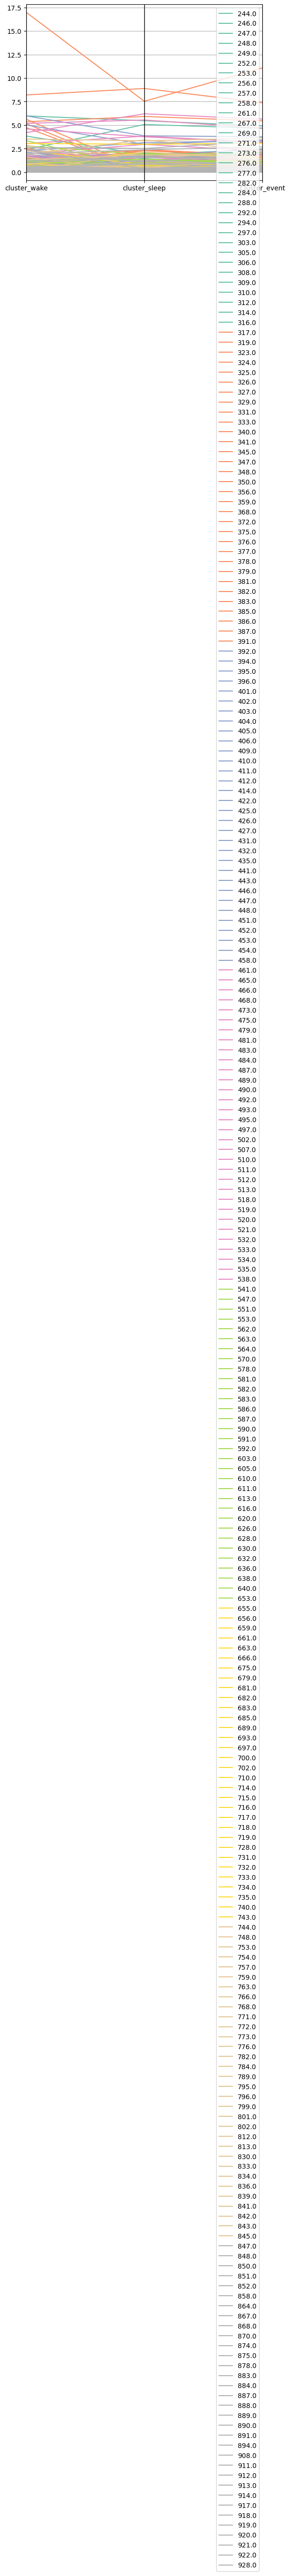

In [3]:
# window to perform the event through spike
window = 300
# Delimitation of sleep and wake as a tuple(True,start of the wake, end of the wake)
chunk_wake = (True,0,6360-2940)
# Delimitation of sleep and wake as a tuple(True,start of the sleep, end of the sleep)
chunk_sleep = (True,6360-2940,9390-2940)
# plotting the parralel plot of spike frequency during event, wake and sleep
plotting.event_spike_freq(Folder ,fs ,fsd,window, phy_path,chunk_wake, chunk_sleep)